# Data Exploration & Preprocessing Notebook

In [ ]:
# 1. Setup and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Notebook settings for better display
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
# 2. Load and Merge Data
# Load the datasets from the Kaggle competition
# Ensure the CSV files are in the same directory or provide the correct path
try:
    train_transaction = pd.read_csv(r'C:\Users\Vignesh\Downloads\data_science\train_transaction.csv')
    train_identity = pd.read_csv(r'C:\Users\Vignesh\Downloads\data_science\test_identity.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("ERROR: Make sure 'train_transaction.csv' and 'train_identity.csv' are in the correct directory.")
    # Exit or handle the error appropriately in a real script
    exit()


# Merge the two dataframes on the common key 'TransactionID'
df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

# Free up memory by deleting the original dataframes
del train_transaction, train_identity

print(f"Data merged successfully. Shape of the final dataframe: {df.shape}")

Datasets loaded successfully.
Data merged successfully. Shape of the final dataframe: (590540, 434)



### Starting Exploratory Data Analysis ###

--- 3.1. Analyzing the Target Variable: 'isFraud' ---
Fraudulent Transactions: 3.50%
Legitimate Transactions: 96.50%


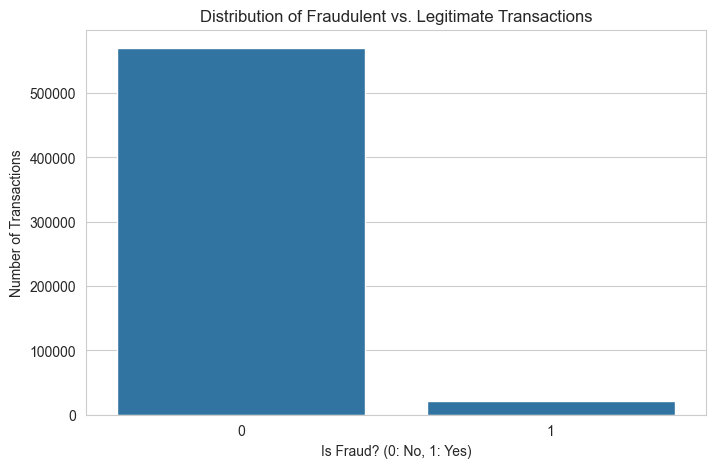


--- 3.2. Analyzing Missing Values ---
Top 20 columns with the most missing values:
             count  percentage
DeviceInfo  590540       100.0
id-11       590540       100.0
id-19       590540       100.0
id-18       590540       100.0
id-17       590540       100.0
id-16       590540       100.0
id-15       590540       100.0
id-14       590540       100.0
id-13       590540       100.0
id-12       590540       100.0
id-09       590540       100.0
id-21       590540       100.0
id-08       590540       100.0
id-07       590540       100.0
id-06       590540       100.0
id-05       590540       100.0
id-04       590540       100.0
id-03       590540       100.0
id-02       590540       100.0
id-01       590540       100.0

--- 3.3. Exploring Key Numerical and Categorical Features ---

Exploring 'TransactionAmt':
count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31

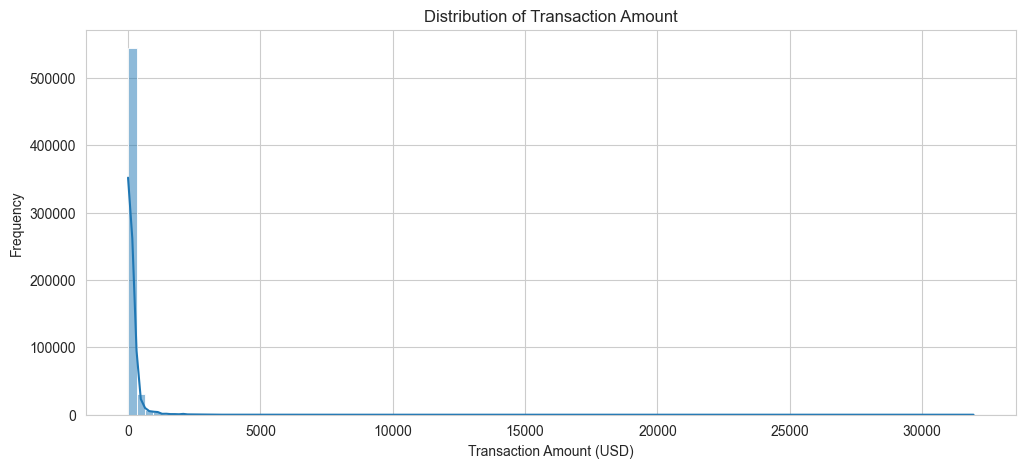

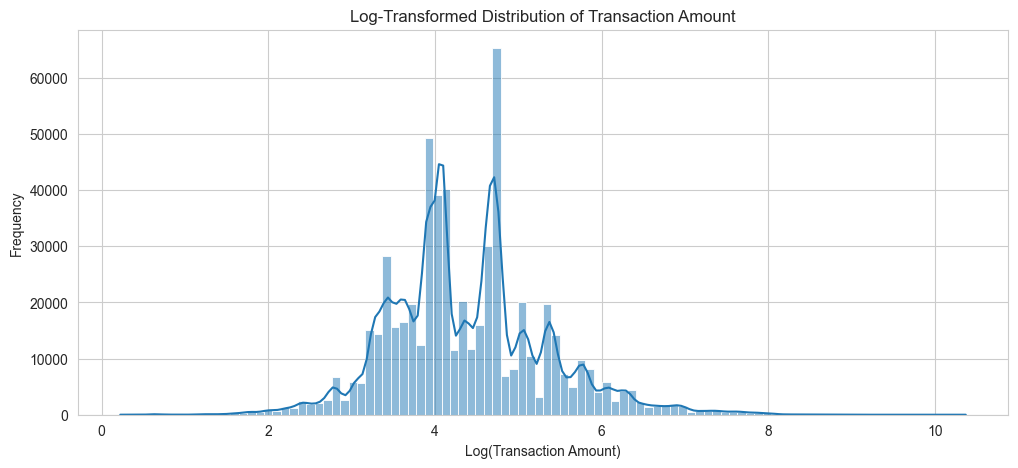


Exploring 'ProductCD':


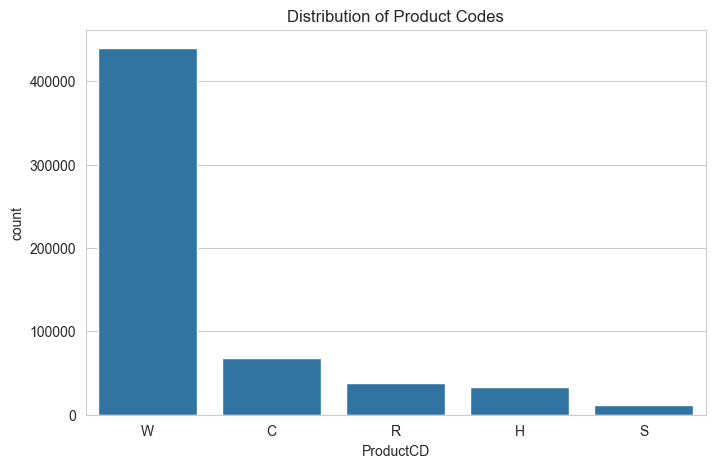

Fraud Rate per Product Code:
ProductCD
C    11.687269
S     5.899553
H     4.766231
R     3.782594
W     2.039939
Name: isFraud, dtype: float64


In [ ]:
print("\n### Starting Exploratory Data Analysis ###")

# 3.1. Target Variable Analysis (isFraud) 
print("\n--- 3.1. Analyzing the Target Variable: 'isFraud' ---")
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
print(f"Fraudulent Transactions: {fraud_percentage[1]:.2f}%")
print(f"Legitimate Transactions: {fraud_percentage[0]:.2f}%")

plt.figure(figsize=(8, 5))
sns.countplot(x='isFraud', data=df)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Is Fraud? (0: No, 1: Yes)')
plt.ylabel('Number of Transactions')
plt.show()


# 3.2. Missing Value Analysis 
print("\n--- 3.2. Analyzing Missing Values ---")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'count': missing_values, 'percentage': missing_percentage})
print("Top 20 columns with the most missing values:")
print(missing_df.sort_values('percentage', ascending=False).head(20))


# 3.3. Exploring Key Features 
print("\n--- 3.3. Exploring Key Numerical and Categorical Features ---")

# Analyzing Transaction Amount ('TransactionAmt')
print("\nExploring 'TransactionAmt':")
print(df['TransactionAmt'].describe())

plt.figure(figsize=(12, 5))
sns.histplot(df['TransactionAmt'], bins=100, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# The distribution is heavily right-skewed. A log transformation might be useful.
plt.figure(figsize=(12, 5))
sns.histplot(np.log1p(df['TransactionAmt']), bins=100, kde=True)
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Frequency')
plt.show()


# Analyzing Product Code ('ProductCD')
print("\nExploring 'ProductCD':")
plt.figure(figsize=(8, 5))
sns.countplot(x='ProductCD', data=df, order=df['ProductCD'].value_counts().index)
plt.title('Distribution of Product Codes')
plt.show()

# Fraud rate by ProductCD
fraud_rate_productcd = df.groupby('ProductCD')['isFraud'].mean() * 100
print("Fraud Rate per Product Code:")
print(fraud_rate_productcd.sort_values(ascending=False))

In [ ]:
print("\n### Starting Data Preprocessing ###")

# 4.1. Handling Missing Values 
# For this demonstration, we'll drop columns with more than 50% missing values.
# In a real scenario, this threshold requires careful consideration.
cols_to_drop = missing_df[missing_df['percentage'] > 50].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped {len(cols_to_drop)} columns with >50% missing values.")

# Impute remaining missing values
# For numerical columns, use the median (robust to outliers)
# For categorical columns, use the mode (most frequent value)
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("Imputed remaining missing values using median for numerical and mode for categorical.")
print(f"Total missing values remaining: {df.isnull().sum().sum()}")


#  4.2. Encoding Categorical Features 
print("\nEncoding categorical features...")
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print("Categorical features encoded using LabelEncoder.")


# 5. Final Check
print("\n### Final Check of Preprocessed Data ###")
print("Data Info after preprocessing:")
df.info()

print("\nFirst 5 rows of the preprocessed dataframe:")
print(df.head())

print("\nPreprocessing task complete. The dataframe is now ready for feature engineering.")


### Starting Data Preprocessing ###


Dropped 214 columns with >50% missing values.


C:\Users\Vignesh\AppData\Local\Temp\ipykernel_116944\707417628.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Vignesh\AppData\Local\Temp\ipykernel_116944\707417628.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

Imputed remaining missing values using median for numerical and mode for categorical.
Total missing values remaining: 0

Encoding categorical features...
Categorical features encoded using LabelEncoder.

### Final Check of Preprocessed Data ###
Data Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 220 entries, TransactionID to V321
dtypes: float64(207), int32(9), int64(4)
memory usage: 970.9 MB

First 5 rows of the preprocessed dataframe:
   TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0        2987000        0          86400            68.5          4  13926   
1        2987001        0          86401            29.0          4   2755   
2        2987002        0          86469            59.0          4   4663   
3        2987003        0          86499            50.0          4  18132   
4        2987004        0          86506            50.0          1   4497   

   card2  card3  card4  

#  Feature Generation


In [ ]:
import pandas as pd
import numpy as np
import datetime

print("### Starting Feature Generation ###")

# It's good practice to work on a copy to avoid unintended modifications
# to the original preprocessed dataframe during experimentation.
X = df.copy()

# 1. Log-Transform Transaction Amount 
# We identified that TransactionAmt is heavily skewed. A log transform helps
# normalize the distribution, which can improve the performance of many models.
print("Step 1: Applying log-transform to 'TransactionAmt'...")
X['TransactionAmt_log'] = np.log1p(X['TransactionAmt'])


### Starting Feature Generation ###
Step 1: Applying log-transform to 'TransactionAmt'...


In [ ]:
# 2. Time-Based Features from TransactionDT 
# TransactionDT is a timedelta in seconds. We convert it to a datetime object
print("Step 2: Creating time-based features from 'TransactionDT'...")
START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
X['TransactionDT_datetime'] = X['TransactionDT'].apply(lambda t: (START_DATE + datetime.timedelta(seconds=t)))

# Extract hour of the day and day of the week
X['Transaction_hour'] = X['TransactionDT_datetime'].dt.hour
X['Transaction_day_of_week'] = X['TransactionDT_datetime'].dt.dayofweek

# We can now drop the intermediate datetime column and the original TransactionDT
X.drop(columns=['TransactionDT_datetime', 'TransactionDT'], inplace=True)

Step 2: Creating time-based features from 'TransactionDT'...


In [ ]:
#  3. Frequency Encoding for High-Cardinality Features 
# Instead of simple label encoding, frequency encoding can capture the significance
# of rare vs. common categories. [cite_start]This is a powerful technique for user behavior features. [cite: 24]
print("Step 3: Applying frequency encoding...")

# Example: P_emaildomain
email_freq = X['P_emaildomain'].value_counts(normalize=True)
X['P_emaildomain_freq'] = X['P_emaildomain'].map(email_freq)

Step 3: Applying frequency encoding...


In [ ]:
#  4. Aggregation Features 
# Creating aggregate features based on groups is one of the most effective ways to
# generate powerful signals. [cite_start]We can see how a transaction compares to the user's typical behavior. [cite: 23, 24]
print("Step 4: Creating aggregation features...")

# Example: Aggregating TransactionAmt by card1
agg_dict = {'TransactionAmt': ['mean', 'std']}
agg_features = X.groupby('card1').agg(agg_dict).reset_index()

# Rename columns for merging
agg_features.columns = ['card1'] + [f'card1_TransactionAmt_{stat}' for stat in agg_dict['TransactionAmt']]

# Merge the new features back into the dataframe
X = pd.merge(X, agg_features, on='card1', how='left')

Step 4: Creating aggregation features...


In [ ]:
#  5. Interaction Features 
# These features capture the relationship between two or more existing features.
print("Step 5: Creating interaction features...")

# Example: How different is the current transaction amount from the card's average?
X['TransactionAmt_vs_card1_mean'] = X['TransactionAmt'] - X['card1_TransactionAmt_mean']

Step 5: Creating interaction features...


In [ ]:

# 6. Final Check 
print("\n### Feature Generation Complete ###")
print(f"Original number of features: {df.shape[1]}")
print(f"New number of features: {X.shape[1]}")

# Display the head with some of the new features to verify
new_feature_cols = [
    'TransactionAmt_log', 'Transaction_hour', 'Transaction_day_of_week',
    'P_emaildomain_freq', 'card1_TransactionAmt_mean', 'card1_TransactionAmt_std',
    'TransactionAmt_vs_card1_mean'
]
print("\nSample of the newly created features:")
print(X[new_feature_cols].head())

# The dataframe 'X' now contains the new features and is ready for feature selection.
# Don't forget to handle potential NaNs created by aggregations (e.g., std for single-transaction cards)
X.fillna(0, inplace=True)
print("\nFilled any new NaNs with 0.")


### Feature Generation Complete ###
Original number of features: 220
New number of features: 226

Sample of the newly created features:
   TransactionAmt_log  Transaction_hour  Transaction_day_of_week  \
0            4.241327                 0                        4   
1            3.401197                 0                        4   
2            4.094345                 0                        4   
3            3.931826                 0                        4   
4            3.931826                 0                        4   

   P_emaildomain_freq  card1_TransactionAmt_mean  card1_TransactionAmt_std  \
0            0.546637                 351.931163                371.141254   
1            0.546637                 234.292753                460.356975   
2            0.008629                  97.015542                100.128858   
3            0.170918                 123.416340                192.717425   
4            0.546637                  96.972222                

In [11]:
! pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Feature Selection & Dimensionality Reduction

In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

print("### Starting Feature Selection & Dimensionality Reduction ###")

features_df = X.copy()


### Starting Feature Selection & Dimensionality Reduction ###


In [ ]:
#  1. Remove Highly Correlated Features ---
# This step reduces redundancy in our feature set.
print("\nStep 1: Removing highly correlated features...")

# Create correlation matrix
corr_matrix = features_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(f"Found {len(to_drop)} highly correlated features to remove.")
features_df.drop(columns=to_drop, inplace=True)

print(f"Dataframe shape after removing correlated features: {features_df.shape}")


Step 1: Removing highly correlated features...
Found 56 highly correlated features to remove.
Dataframe shape after removing correlated features: (590540, 170)



Step 2: Performing model-based feature selection...
Training LightGBM to get feature importances...
[LightGBM] [Info] Number of positive: 20663, number of negative: 569877
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.212530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11410
[LightGBM] [Info] Number of data points in the train set: 590540, number of used features: 166
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034990 -> initscore=-3.317076
[LightGBM] [Info] Start training from score -3.317076

Top 20 most important features:
                         feature  importance
0                          card1        1890
1      card1_TransactionAmt_mean        1680
2                          addr1        1621
3       card1_TransactionAmt_std        1599
4                 TransactionAmt        1576
5                          card2  

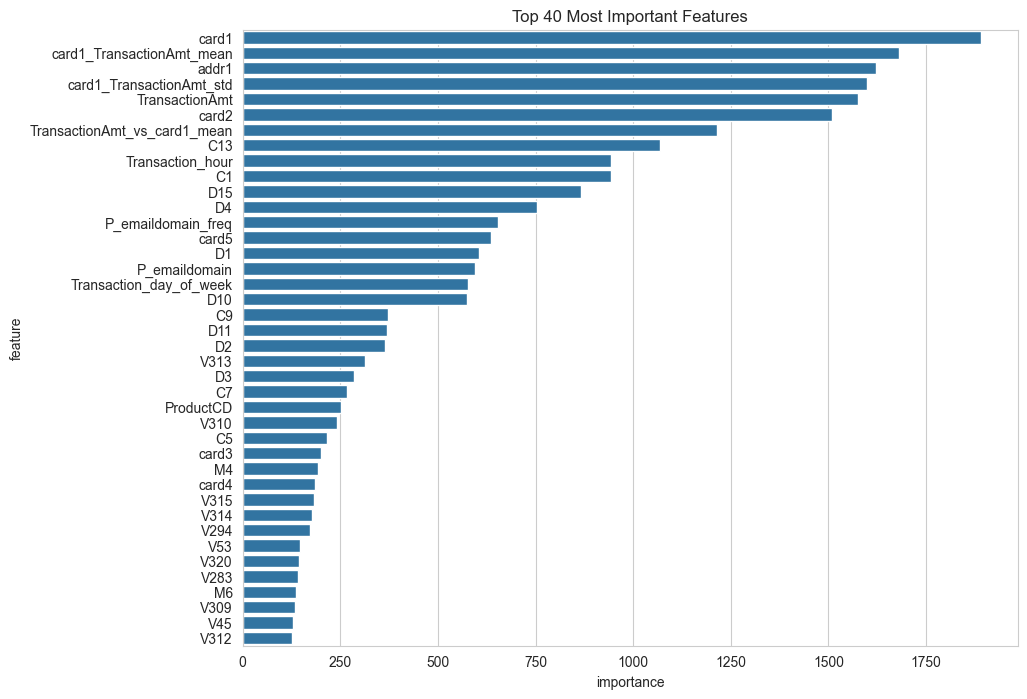

In [ ]:
# 2. Model-Based Feature Selection using LightGBM ---
# We use a model to identify the most predictive features.
# This is a practical implementation of Recursive Feature Elimination (RFE) principles.
print("\nStep 2: Performing model-based feature selection...")

# Separate the target variable 'isFraud' and drop the identifier 'TransactionID'
y = features_df['isFraud']
X_features = features_df.drop(columns=['isFraud', 'TransactionID'])

# Train a LightGBM model to get feature importances
# Using the full dataset here gives us the most stable importance scores for selection
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    n_estimators=1000,
    random_state=42,
    n_jobs=-1
)

print("Training LightGBM to get feature importances...")
lgb_model.fit(X_features, y)

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({
    'feature': X_features.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False).reset_index(drop=True)

print("\nTop 20 most important features:")
print(feature_importances.head(20))

# Visualize the top features
plt.figure(figsize=(10, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances.head(40)
)
plt.title('Top 40 Most Important Features')
plt.show()

In [ ]:

#  3. Select the Top N Features ---
# We will now create our final dataframe using only the most predictive features.
print("\nStep 3: Selecting the top features for the final model...")
N_FEATURES = 150 # This number is a hyperparameter you can tune
top_features = feature_importances['feature'].head(N_FEATURES).tolist()

# Create the final selected features dataframe
X_selected = features_df[top_features]

# The target variable 'y' remains the same
y_final = y

print(f"\nFinal selected feature set shape: {X_selected.shape}")


# --- 4. Final Check ---
print("\n### Feature Selection Complete ###")
print("The 'X_selected' DataFrame and 'y_final' Series are now ready for model training in Phase 3.")
print(X_selected.head())


Step 3: Selecting the top features for the final model...

Final selected feature set shape: (590540, 150)

### Feature Selection Complete ###
The 'X_selected' DataFrame and 'y_final' Series are now ready for model training in Phase 3.
   card1  card1_TransactionAmt_mean  addr1  card1_TransactionAmt_std  \
0  13926                 351.931163  315.0                371.141254   
1   2755                 234.292753  325.0                460.356975   
2   4663                  97.015542  330.0                100.128858   
3  18132                 123.416340  476.0                192.717425   
4   4497                  96.972222  420.0                 56.629451   

   TransactionAmt  card2  TransactionAmt_vs_card1_mean   C13  \
0            68.5  361.0                   -283.431163   1.0   
1            29.0  404.0                   -205.292753   1.0   
2            59.0  490.0                    -38.015542   1.0   
3            50.0  567.0                    -73.416340  25.0   
4         

# Model Development & Training

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [ ]:
print("### Starting Model Development & Training ###")


# 1. Splitting the Data ---
# We split our data into training and testing sets. Stratifying by 'y' ensures that
print("\nStep 1: Splitting data into training and testing sets...")

X_train, X_test, y_train, y_test = train_test_split(
    X_selected,
    y_final,
    test_size=0.2,
    random_state=42,
    stratify=y_final  # Crucial for imbalanced datasets
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

### Starting Model Development & Training ###

Step 1: Splitting data into training and testing sets...
Training set shape: (472432, 150)
Testing set shape: (118108, 150)


In [ ]:
#  2. Handling Class Imbalance with SMOTE 
# We apply SMOTE ONLY to the training data to create synthetic fraudulent samples.
print("\nStep 2: Applying SMOTE to the training data...")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())



Step 2: Applying SMOTE to the training data...
Class distribution before SMOTE:
isFraud
0    455902
1     16530
Name: count, dtype: int64

Class distribution after SMOTE:
isFraud
0    455902
1    455902
Name: count, dtype: int64


In [ ]:
# 3. Model Training and Baseline Evaluation 
# We will train several models and evaluate them on the original (imbalanced) test set
# [cite_start]to find the best performing architecture. [cite: 27, 28]
print("\nStep 3: Training and evaluating baseline models...")

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {roc_auc:.4f}")
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"AUC-PR Score: {pr_auc:.4f}")



Step 3: Training and evaluating baseline models...

--- Training Logistic Regression ---


C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87    113975
           1       0.10      0.63      0.17      4133

    accuracy                           0.78    118108
   macro avg       0.54      0.71      0.52    118108
weighted avg       0.95      0.78      0.85    118108

AUC-ROC Score: 0.7823
AUC-PR Score: 0.1378

--- Training Random Forest ---

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.87      0.51      0.65      4133

    accuracy                           0.98    118108
   macro avg       0.93      0.75      0.82    118108
weighted avg       0.98      0.98      0.98    118108

AUC-ROC Score: 0.9300
AUC-PR Score: 0.7185

--- Training XGBoost ---


C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:44:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.78      0.48      0.60      4133

    accuracy                           0.98    118108
   macro avg       0.88      0.74      0.79    118108
weighted avg       0.97      0.98      0.97    118108

AUC-ROC Score: 0.9153
AUC-PR Score: 0.6198


# Hyperparameter Tuning (for XGBoost)

In [ ]:

#  4. Hyperparameter Tuning (for XGBoost) 
# Assuming XGBoost performed best, we now tune its hyperparameters to maximize performance.
print("\nStep 4: Performing hyperparameter tuning on XGBoost...")

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2]
}

# Initialize RandomizedSearchCV
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

print("Starting Randomized Search...")
random_search.fit(X_train_resampled, y_train_resampled)

print(f"\nBest parameters found: {random_search.best_params_}")

# Evaluate the best model from the search
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

print("\n--- Final Tuned XGBoost Model Evaluation ---")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"Tuned AUC-ROC Score: {roc_auc_tuned:.4f}")

precision_tuned, recall_tuned, _ = precision_recall_curve(y_test, y_pred_proba_tuned)
pr_auc_tuned = auc(recall_tuned, precision_tuned)
print(f"Tuned AUC-PR Score: {pr_auc_tuned:.4f}")

print("\n### Model Development Phase Complete ###")


Step 4: Performing hyperparameter tuning on XGBoost...
Starting Randomized Search...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [18:20:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best parameters found: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}

--- Final Tuned XGBoost Model Evaluation ---

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113975
           1       0.88      0.56      0.69      4133

    accuracy                           0.98    118108
   macro avg       0.93      0.78      0.84    118108
weighted avg       0.98      0.98      0.98    118108

Tuned AUC-ROC Score: 0.9558
Tuned AUC-PR Score: 0.7569

### Model Development Phase Complete ###


# Model Evaluation & Optimization

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

### Starting Model Evaluation & Optimization ###

Step 1: Generating Confusion Matrix...


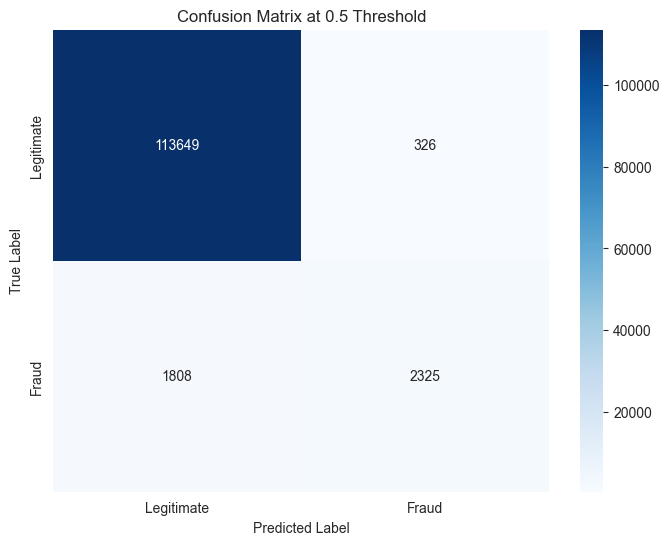

In [ ]:
print("### Starting Model Evaluation & Optimization ###")

#  1. In-Depth Evaluation with a Confusion Matrix 
# We visualize the model's performance to see the exact number of correct
# and incorrect predictions for each class.
print("\nStep 1: Generating Confusion Matrix...")

# Use the predictions from the default 0.5 threshold
y_pred_default_threshold = (y_pred_proba_tuned >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_default_threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraud'],
            yticklabels=['Legitimate', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix at 0.5 Threshold')
plt.show()



Step 2: Optimizing the Decision Threshold...


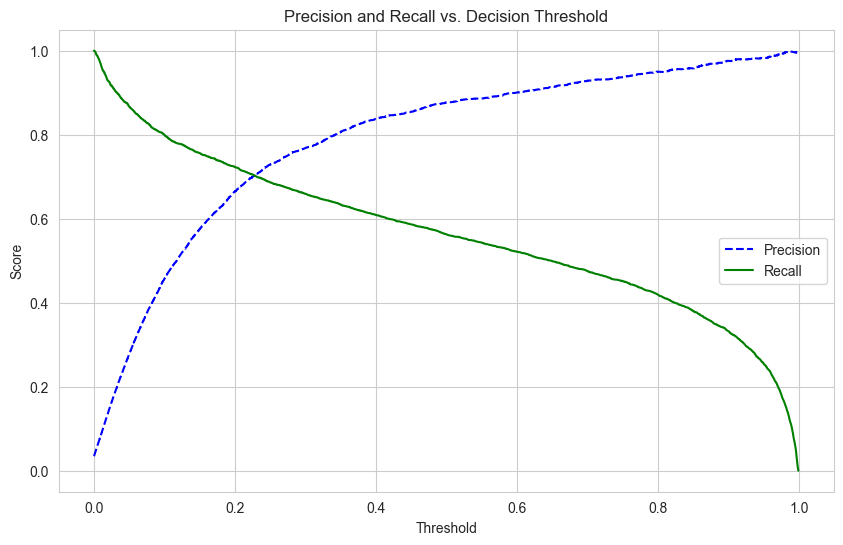


New threshold to achieve ~80% Recall: 0.0000

Classification Report at New Threshold:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    113975
           1       0.03      1.00      0.07      4133

    accuracy                           0.03    118108
   macro avg       0.02      0.50      0.03    118108
weighted avg       0.00      0.03      0.00    118108



C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vignesh\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [ ]:

#  2. Threshold Optimization 
# The default 0.5 threshold might not be optimal for business needs. We analyze the
# precision-recall curve to find a better threshold.
print("\nStep 2: Optimizing the Decision Threshold...")

# Get precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_tuned)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Decision Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Find a new threshold, for example, one that achieves at least 80% recall
try:
    high_recall_threshold = thresholds[np.min(np.where(recall >= 0.8))]
    print(f"\nNew threshold to achieve ~80% Recall: {high_recall_threshold:.4f}")

    # Evaluate the model with the new threshold
    y_pred_new_threshold = (y_pred_proba_tuned >= high_recall_threshold).astype(int)

    print("\nClassification Report at New Threshold:")
    print(classification_report(y_test, y_pred_new_threshold))

except (ValueError, IndexError):
    print("\nCould not find a threshold for 80% recall. The model's max recall might be lower.")


Step 3: Interpreting Model Predictions with SHAP...
Calculating SHAP values for the test set (this may take a moment)...

Generating SHAP summary plot for global feature importance...


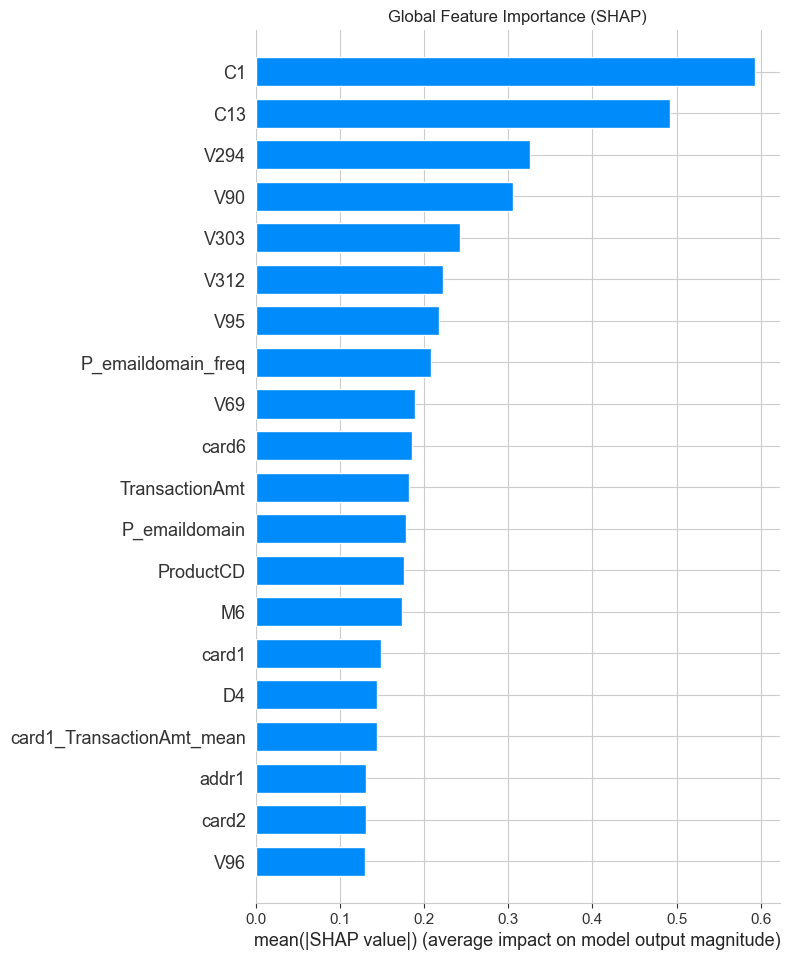


Generating SHAP force plot for a single fraudulent prediction (index: 58)...


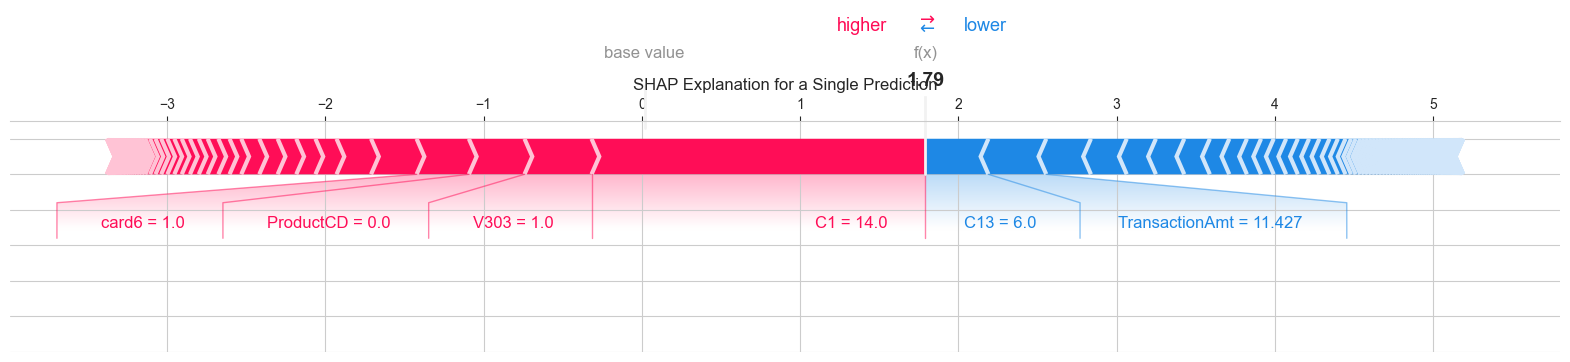


### Model Evaluation & Optimization Phase Complete ###


In [ ]:

# 3. Model Interpretability with SHAP 
# We use SHAP to understand *why* the model makes its decisions, building trust
# and providing actionable insights for review teams.
print("\nStep 3: Interpreting Model Predictions with SHAP...")

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_model)
print("Calculating SHAP values for the test set (this may take a moment)...")
shap_values = explainer.shap_values(X_test)

# Global Feature Importance 
# SHAP summary plot gives a high-level view of which features are most important.
print("\nGenerating SHAP summary plot for global feature importance...")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Global Feature Importance (SHAP)")
plt.show()

# Individual Prediction Explanation 
# Explain a single prediction to see what features drove the decision.
# Let's find a fraudulent transaction that the model correctly identified.
correctly_predicted_fraud_indices = np.where((y_test == 1) & (y_pred_new_threshold == 1))[0]

if len(correctly_predicted_fraud_indices) > 0:
    idx_to_explain = correctly_predicted_fraud_indices[0]
    print(f"\nGenerating SHAP force plot for a single fraudulent prediction (index: {idx_to_explain})...")
    
    # The plot shows features pushing the prediction higher (red) or lower (blue).
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx_to_explain, :],
        X_test.iloc[idx_to_explain, :],
        matplotlib=True,
        show=False
    )
    plt.title(f"SHAP Explanation for a Single Prediction")
    plt.show()
else:
    print("\nCould not find a correctly predicted fraudulent transaction to explain.")

print("\n### Model Evaluation & Optimization Phase Complete ###")

# Save Model and Feature List for API Deployment

In [ ]:

import joblib
import json

# 'best_model' is our tuned XGBoost classifier from Phase 3
# 'X_selected' is our final features DataFrame from Phase 2
model_filename = 'fraud_model.joblib'
features_filename = 'model_features.json'

# Save the trained model
joblib.dump(best_model, model_filename)

# Save the list of feature names in the exact order the model expects them
feature_names = X_selected.columns.tolist()
with open(features_filename, 'w') as f:
    json.dump(feature_names, f)

print(f"Model saved to '{model_filename}'")
print(f"Feature list saved to '{features_filename}'")

Model saved to 'fraud_model.joblib'
Feature list saved to 'model_features.json'
